<a href="https://colab.research.google.com/github/cacaalqorina/Image-Classification-Model-Deployment/blob/main/Submission_Image_Classification_Model_Deployment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import zipfile, os

In [ ]:
local_zip = '/content/flowers.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content/')
zip_ref.close()

In [ ]:
base_dir = os.path.join('/content/flowers')
labels = os.listdir(base_dir)

label_and_items = {}

for label in labels:
  items = os.listdir(os.path.join(base_dir, label))
  label_and_items[label] = len(items)

label_and_items

{'rose': 784, 'sunflower': 733, 'daisy': 764, 'dandelion': 1052, 'tulip': 984}

In [ ]:
import shutil
def remove_label(label):
  shutil.rmtree(os.path.join(base_dir, label))
  labels.remove(label)
  label_and_items.pop(label)

In [ ]:
remove_label('dandelion')
remove_label('tulip')

In [ ]:
label_and_items

{'rose': 784, 'sunflower': 733, 'daisy': 764}

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255.0,
                                   rotation_range=20,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   vertical_flip=True,
                                   fill_mode='nearest',
                                   validation_split=0.2)

In [ ]:
train_generator = train_datagen.flow_from_directory(base_dir,
                                                    target_size=(150, 150),
                                                    batch_size=32,
                                                    class_mode='categorical',
                                                    subset='training')

validation_generator = train_datagen.flow_from_directory(base_dir,
                                                         target_size=(150, 150),
                                                         batch_size=32,
                                                         class_mode='categorical',
                                                         subset='validation')

Found 1827 images belonging to 3 classes.
Found 454 images belonging to 3 classes.


In [ ]:
model = keras.Sequential([
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(len(labels), activation='softmax')
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 64)       0

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])

In [ ]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if logs.get('accuracy') >= 0.85 and logs.get('val_accuracy') >= 0.85:
      print('STOP')
      self.model.stop_training = True

callbacks = myCallback()

In [ ]:
history=model.fit(
      train_generator,
      steps_per_epoch=4,  
      epochs=100, 
      validation_data=validation_generator, 
      validation_steps=4,  
      verbose=2,
      callbacks=[callbacks])

Epoch 1/100
4/4 - 8s - loss: 1.5105 - accuracy: 0.4219 - val_loss: 1.4149 - val_accuracy: 0.3594 - 8s/epoch - 2s/step
Epoch 2/100
4/4 - 6s - loss: 1.2003 - accuracy: 0.3594 - val_loss: 1.0438 - val_accuracy: 0.3984 - 6s/epoch - 1s/step
Epoch 3/100
4/4 - 6s - loss: 1.0398 - accuracy: 0.4297 - val_loss: 0.9750 - val_accuracy: 0.5469 - 6s/epoch - 1s/step
Epoch 4/100
4/4 - 6s - loss: 0.9232 - accuracy: 0.5703 - val_loss: 0.8167 - val_accuracy: 0.5938 - 6s/epoch - 1s/step
Epoch 5/100
4/4 - 8s - loss: 0.8113 - accuracy: 0.6250 - val_loss: 0.7865 - val_accuracy: 0.7188 - 8s/epoch - 2s/step
Epoch 6/100
4/4 - 6s - loss: 0.7277 - accuracy: 0.6953 - val_loss: 0.7206 - val_accuracy: 0.6719 - 6s/epoch - 2s/step
Epoch 7/100
4/4 - 6s - loss: 0.6274 - accuracy: 0.7031 - val_loss: 0.8139 - val_accuracy: 0.6328 - 6s/epoch - 2s/step
Epoch 8/100
4/4 - 6s - loss: 0.5736 - accuracy: 0.7422 - val_loss: 1.0859 - val_accuracy: 0.5469 - 6s/epoch - 2s/step
Epoch 9/100
4/4 - 6s - loss: 0.7303 - accuracy: 0.7422 -

In [ ]:
import matplotlib.pyplot as plt

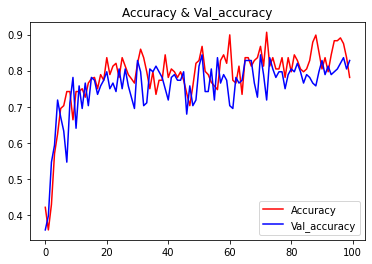

<Figure size 432x288 with 0 Axes>

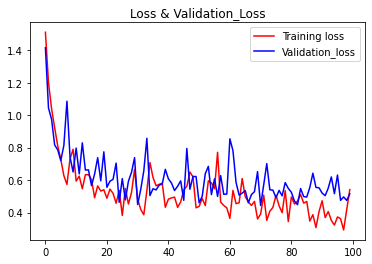

<Figure size 432x288 with 0 Axes>

In [ ]:
acc = history.history['accuracy']                                                
val_acc = history.history['val_accuracy']                                         
loss = history.history['loss']                                                    
val_loss = history.history['val_loss']                                            

epochs = range(len(acc))                                                          

plt.plot(epochs, acc, 'r', label='Accuracy')                                                 
plt.plot(epochs, val_acc, 'b', label='Val_accuracy')                          
plt.title('Accuracy & Val_accuracy')                                        
plt.legend(loc=0)                                                                 
plt.figure()                                                                      
plt.show()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation_loss')
plt.title('Loss & Validation_Loss')
plt.legend(loc=0)
plt.figure()
plt.show()

In [ ]:
print(train_generator.class_indices)

{'daisy': 0, 'rose': 1, 'sunflower': 2}


Saving 100080576_f52e8ee070_n.jpg to 100080576_f52e8ee070_n (1).jpg
1/1 [==============================] - 0s 132ms/step
100080576_f52e8ee070_n.jpg
sunflower


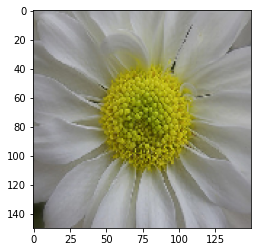

In [ ]:
import numpy as np
from google.colab import files
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
 
uploaded = files.upload()
 
for fn in uploaded.keys():
 
  path = fn
  img = image.load_img(path, target_size=(150, 150))
 
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])
 
  classes = model.predict(images, batch_size=32)  
  print(fn)
  if classes[0][0]==1:
    print('daisy')                                 
  elif classes[0][1]==1:
    print('rose')                                   
  elif classes[0][2]==1:
    print('sunflower')                                
  else:
    print('UNKNOWN')

In [ ]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

In [ ]:
with tf.io.gfile.GFile("model.tflite", "wb") as f:
  f.write(tflite_model)